### Decision Trees in Phishing Detection

In phishing detection, accurately identifying whether a URL or email is legitimate or fraudulent is critical for cybersecurity. Phishing attacks, which trick users into revealing sensitive information, are a prevalent threat in today’s digital landscape. Decision trees can effectively distinguish between legitimate and phishing samples based on predefined features. Their hierarchical structure, breaking down complex decisions into a series of simple yes/no splits, makes them valuable for this task.

Decision trees are particularly beneficial in phishing detection for several reasons:

- **Transparency**: They provide a clear, interpretable model, making it easy to understand why specific decisions are made.
- **Efficiency**: Decision trees can handle both numerical and categorical data, making them versatile for various types of phishing features.
- **Non-linearity**: Phishing datasets often have non-linear relationships, and decision trees can model these relationships without requiring transformations.


In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


In [2]:
balanced_df =  pd.read_csv('subset.csv')

In [5]:
# Selecting relevant columns
numerical_features = ['url_length', 'url_entropy', 'digit_letter_ratio', 
                     'dot_count', 'at_count', 'dash_count', 'tld_count',
                     'subdomain_count', 'nan_char_entropy', 'domain_age_days']
categorical_features = ['label']

balanced_df = balanced_df[numerical_features + categorical_features]

In [6]:
# Encode categorical variables
balanced_df['label_encoded'] = balanced_df['label'].map({'legitimate': 0, 'phishing': 1})

# Create feature matrix X with only numerical columns
X = balanced_df[numerical_features].copy()
y = balanced_df['label_encoded'].copy()

In [7]:
# Handle missing values
X = X.fillna(X.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Training Set Accuracy: 1.0
Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40078
           1       1.00      1.00      1.00     39922

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



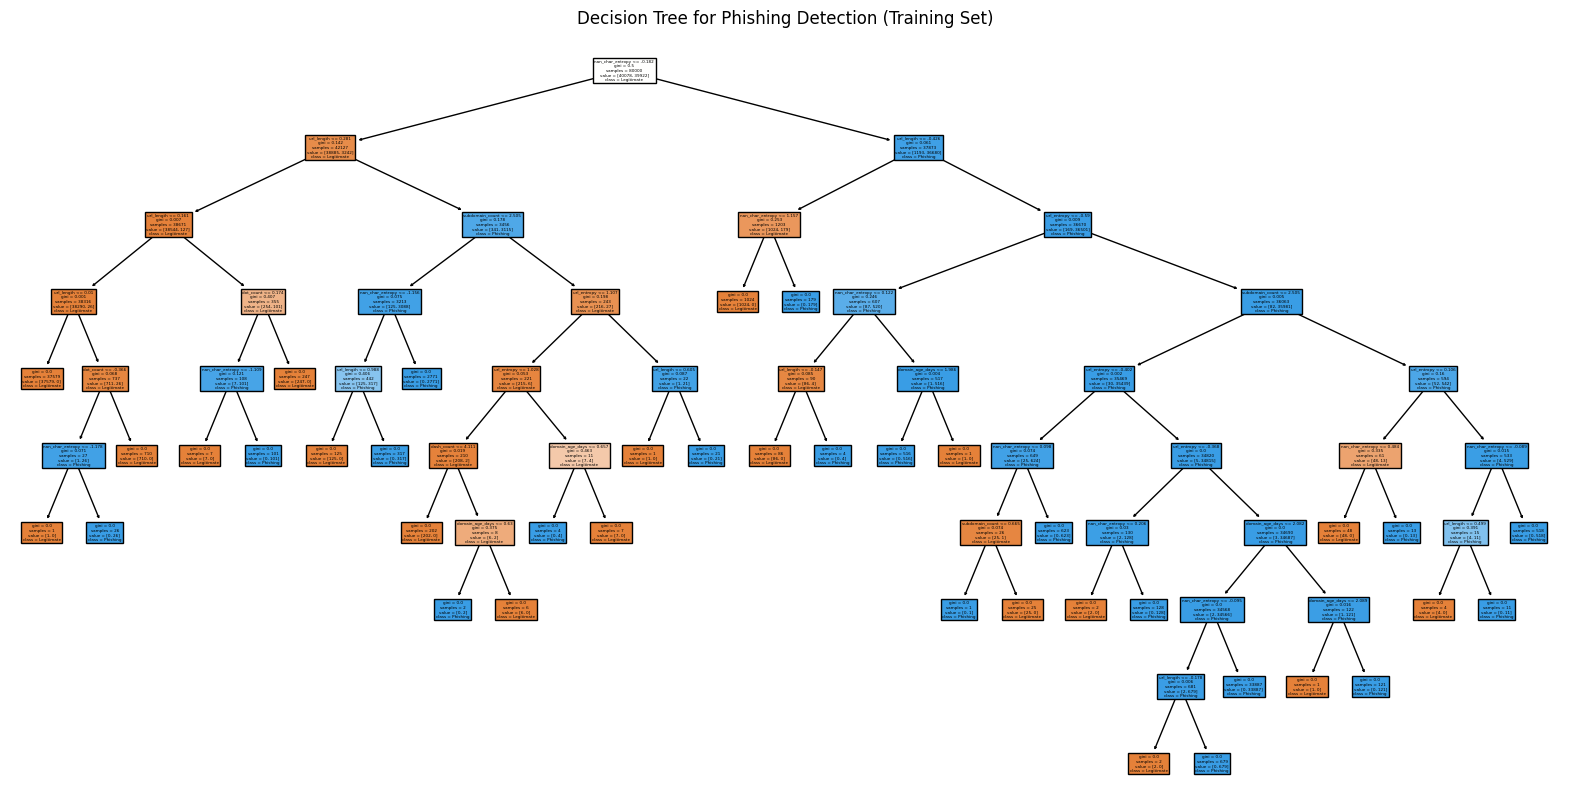

In [14]:
# Train a decision tree classifier on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the decision tree on the training set
y_train_pred = clf.predict(X_train)
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Set Classification Report:\n", classification_report(y_train, y_train_pred))

# Visualize the decision tree trained on the training set
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=numerical_features, class_names=['Legitimate', 'Phishing'], filled=True)
plt.title("Decision Tree for Phishing Detection (Training Set)")
plt.show()

In [15]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],        # Try a range of depths, or None for no limit
    'min_samples_split': [10, 20, 30, 40],          # Minimum samples required to split a node
    'min_samples_leaf': [5, 10, 15, 20]             # Minimum samples required in a leaf node
}

# Initialize the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Set up the grid search with cross-validation, using only the training set
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_params)

# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train)
print("\nTraining Set Evaluation:")
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
print("\nTest Set Evaluation:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=20; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=20; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=20; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=40; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=20; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=30; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=30; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=30; total time=

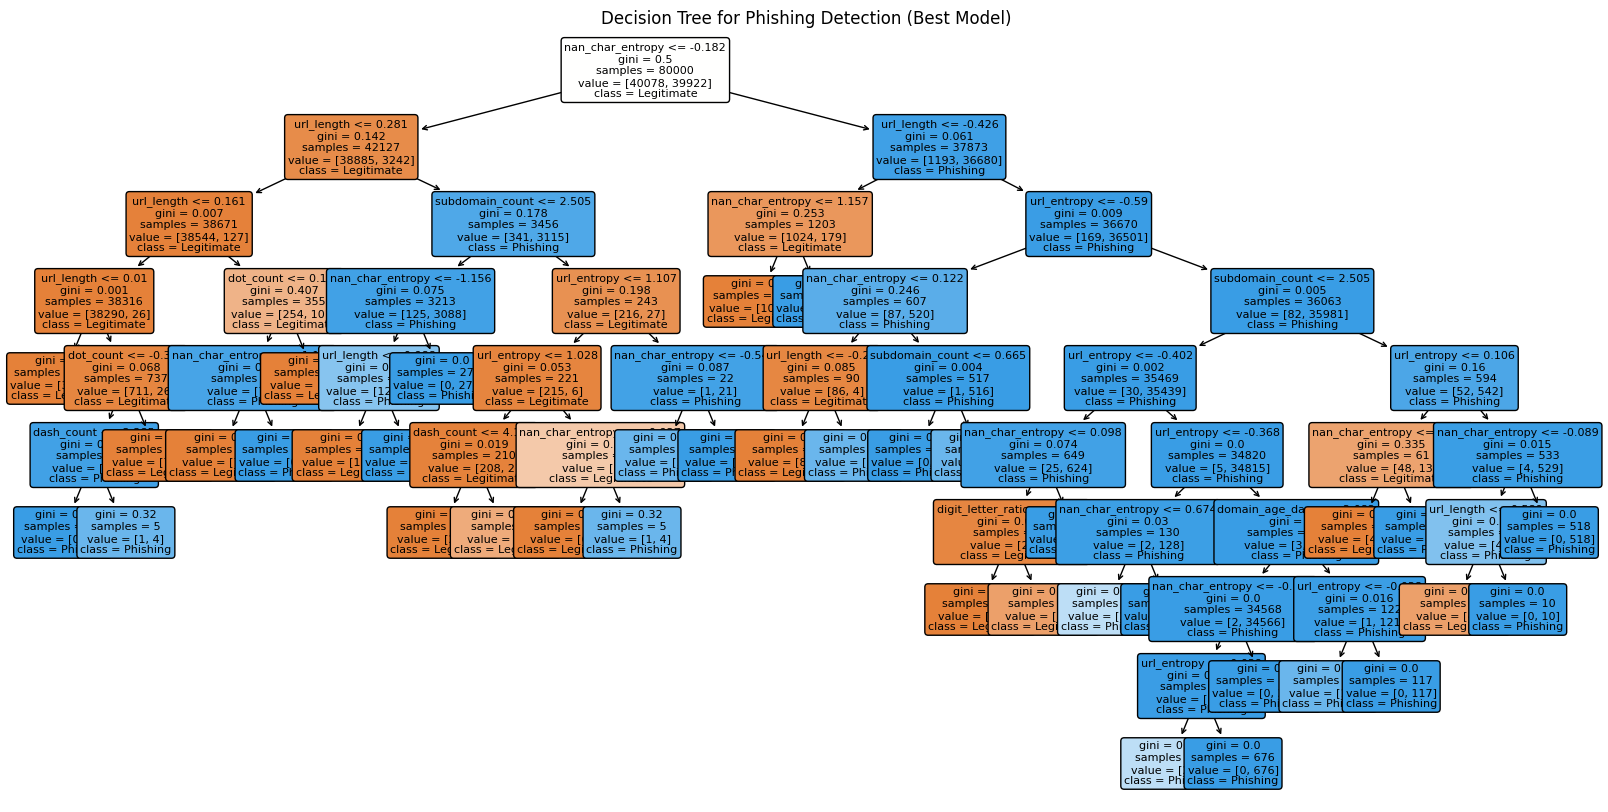

In [20]:


# Plot the best decision tree model
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=numerical_features,  # Replace with your feature names list
    class_names=['Legitimate', 'Phishing'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Phishing Detection (Best Model)")
plt.show()


### Interpretation of Results

1. **High Accuracy and F1-Score**:
   - The decision tree model achieved an accuracy of **99.98% on both the training and test sets**.
   - Precision, recall, and F1-scores are all close to 1.00 across both classes, indicating that the model is highly effective at identifying legitimate and phishing cases with minimal misclassification.

2. **Generalization**:
   - With nearly identical accuracies on the training and test sets, this model demonstrates strong generalization capabilities, suggesting that it does not overfit the training data.
   - The high performance on the test set suggests that the model successfully captures the underlying patterns in this dataset rather than simply memorizing the data.

### Explanation of Parameter Effectiveness

- **`max_depth=None`**: Allowing the decision tree to grow without a depth limit appears effective, possibly because the dataset is naturally separable without needing an overly complex structure.
- **`min_samples_split=10` and `min_samples_leaf=5`**: These values regulate the minimum samples required for splits and leaf nodes, respectively, which prevents the model from becoming excessively granular and mitigates overfitting.

### Summary

These results are notably strong, suggesting that this dataset contains features that make phishing vs. legitimate classification straightforward. The high reliability of this model is demonstrated by its consistent performance across training and test sets, indicating it is well-suited for deployment and practical applications.
